In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('CarPrice.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
df[["Company", "Model"]] = df['CarName'].str.split(" ", n = 1, expand = True)
df = df.drop(df[~df["CarName"].str.contains(" ")].index, axis = 0)
df = df.drop(["CarName", "car_ID"], axis = 1)
df["Company"] = df["Company"].str.replace("maxda", "mazda")
df["Company"] = df["Company"].str.replace("nissan", "Nissan")
df["Company"] = df["Company"].str.replace("porcshce", "porshe")
df["Company"] = df["Company"].str.replace("toyouta", "toyota")
def replace_contain_chars(text, target = "civic"):
    if (target in text):
        return target
    else:
        return text
df["Model"] = df["Model"].apply(replace_contain_chars)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [15]:
#record mean and sd for numeric features for further re-scale
mean_numeric = {}
sd_numeric = {}
for column in df.columns:
    if (df[column].dtype == "int64" or df[column].dtype == "float64"):
        mean_numeric[column] = df[column].mean()
        sd_numeric[column] = df[column].std()
from sklearn.preprocessing import StandardScaler
df["symboling"] = df["symboling"].astype(object)
numeric_columns = []
for column in df.columns:
    if (df[column].dtype in ["int64", "float64"]):
        numeric_columns.append(column)
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,volvo,246


In [16]:
df["doornumber"] = df["doornumber"].apply(lambda x: 2 if x == "two" else 4)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in df.columns:
    if (df[column].dtype == "object" and column != "symboling"):
        df[column] = encoder.fit_transform(df[column])

In [17]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,1,74
1,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,1,118
2,1,1,0,2,2,2,0,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,1,28
3,2,1,0,4,3,1,0,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,2,0
4,2,1,0,4,3,0,0,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,23,5
201,-1,1,1,4,3,2,0,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,23,4
202,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,23,6
203,-1,0,1,4,3,2,0,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,23,8


In [5]:
!pip install pycaret

In [18]:
import pycaret
from pycaret.regression import *

In [19]:
s = setup(data = df, target = 'price', session_id=123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(203, 26)"
4,Transformed data shape,"(203, 31)"
5,Transformed train set shape,"(142, 31)"
6,Transformed test set shape,"(61, 31)"
7,Numeric features,24
8,Categorical features,1
9,Preprocess,True


In [20]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2138,0.0868,0.2830,0.9002,0.1545,1.5752,0.2210
rf,Random Forest Regressor,0.2234,0.0981,0.3008,0.8935,0.1566,1.7137,0.2900
gbr,Gradient Boosting Regressor,0.2314,0.1015,0.3073,0.8886,0.1577,1.7816,0.3110
xgboost,Extreme Gradient Boosting,0.2339,0.1129,0.3217,0.8818,0.1540,1.6629,0.1410
ada,AdaBoost Regressor,0.2615,0.1176,0.3339,0.8688,0.1817,1.9728,0.2670
dt,Decision Tree Regressor,0.2624,0.1564,0.3812,0.8164,0.1654,1.3460,0.0680
lightgbm,Light Gradient Boosting Machine,0.2871,0.1588,0.3881,0.8159,0.2000,2.0576,0.1260
br,Bayesian Ridge,0.3369,0.2151,0.4524,0.7291,0.2223,2.3566,0.1230
ridge,Ridge Regression,0.3365,0.2141,0.4470,0.7280,0.2250,2.1856,0.0670
huber,Huber Regressor,0.3535,0.2651,0.4916,0.6659,0.2305,2.3854,0.0980


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [21]:
extra_trees = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1874,0.0639,0.2527,0.8502,0.1675,4.2964
1,0.1986,0.0595,0.2440,0.9300,0.1469,1.7893
2,0.3059,0.2239,0.4732,0.8950,0.1750,0.4297
3,0.1925,0.0600,0.2449,0.7776,0.1749,0.3775
4,0.2373,0.0945,0.3073,0.9373,0.1586,0.7282
5,0.2692,0.1205,0.3471,0.8540,0.2086,2.1354
6,0.2512,0.1098,0.3313,0.9084,0.1541,0.3463
7,0.1342,0.0304,0.1744,0.9234,0.0928,0.7669
8,0.1535,0.0369,0.1921,0.9649,0.1283,4.0916


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
extra_tree_tune = tune_model(extra_trees)
print (extra_tree_tune)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2443,0.0933,0.3054,0.7813,0.2015,3.5592
1,0.2030,0.0713,0.2670,0.9162,0.1350,1.5627
2,0.3605,0.3702,0.6085,0.8265,0.1964,0.4165
3,0.2047,0.0627,0.2504,0.7676,0.1837,0.4041
4,0.2180,0.0796,0.2822,0.9472,0.1532,0.5992
5,0.3070,0.1294,0.3598,0.8431,0.2283,4.1794
6,0.2419,0.0854,0.2922,0.9288,0.1411,0.3203
7,0.1496,0.0345,0.1858,0.9130,0.1125,0.9950
8,0.1444,0.0420,0.2049,0.9601,0.1522,5.0784


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [24]:
linear_regression = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3120,0.1528,0.3909,0.6418,0.2322,2.5760
1,0.2873,0.1307,0.3615,0.8464,0.2022,1.0074
2,0.4328,0.5492,0.7411,0.7426,0.2526,0.5424
3,0.2692,0.1245,0.3528,0.5384,0.2094,0.6332
4,0.2472,0.0917,0.3028,0.9392,0.1555,0.7715
5,0.4390,0.3235,0.5688,0.6080,0.3487,9.7611
6,38961945405.2614,21252464656391394557952.0000,145782250827.7033,-17730146901616976986112.0000,7.0931,61260319781.8022
7,0.3449,0.1867,0.4321,0.5298,0.2379,1.7621
8,0.4547,0.3903,0.6247,0.6288,0.2605,0.9526


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
linear_regression_tune = tune_model(linear_regression)
print (linear_regression_tune)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3124,0.1530,0.3911,0.6413,0.2322,2.5844
1,0.2879,0.1309,0.3618,0.8462,0.2023,1.0039
2,0.4328,0.5493,0.7411,0.7426,0.2526,0.5425
3,0.2690,0.1244,0.3527,0.5388,0.2095,0.6329
4,0.2472,0.0917,0.3028,0.9392,0.1555,0.7716
5,0.4391,0.3235,0.5688,0.6079,0.3487,9.7558
6,0.3490,0.2251,0.4745,0.8122,0.1653,0.5421
7,0.3449,0.1871,0.4325,0.5287,0.2371,1.7591
8,0.4545,0.3898,0.6244,0.6292,0.2605,0.9593


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


LinearRegression(fit_intercept=False, n_jobs=-1)


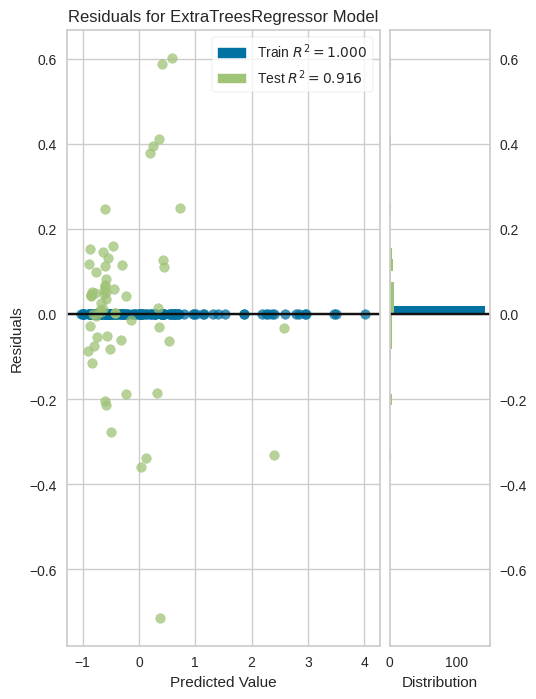

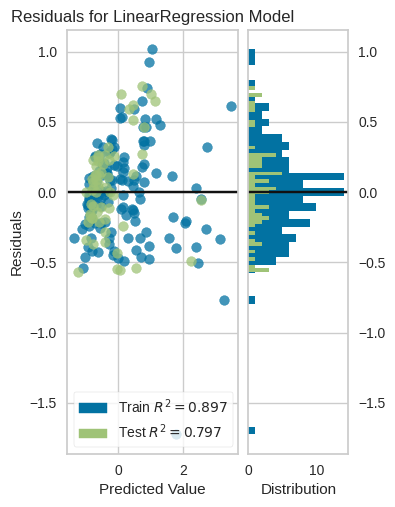

In [28]:

from matplotlib import pyplot as plt
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plot_model(extra_trees)
plt.subplot(1, 2, 2)
plot_model(linear_regression)
plt.show()

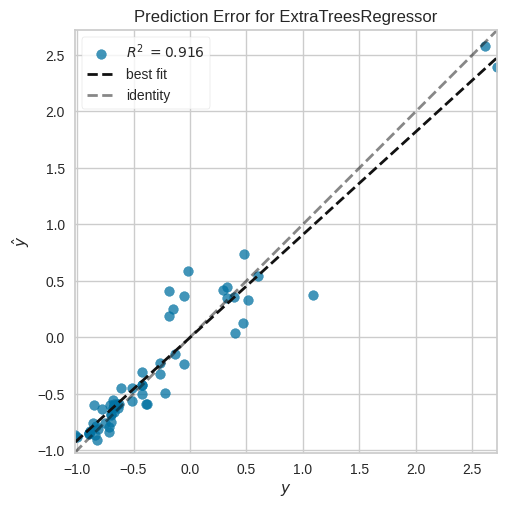

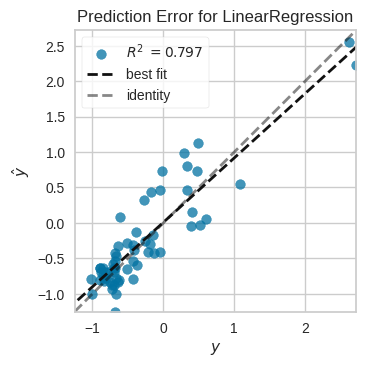

In [29]:
# predicted error plot
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plot_model(extra_trees, plot = 'error')
plt.subplot(1, 2, 2)
plot_model(linear_regression, plot = 'error')
plt.show()

In [32]:
final_extra_trees = finalize_model(extra_trees)
print (final_extra_trees)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fueltype', 'aspiration',
                                             'doornumber', 'carbody',
                                             'drivewheel', 'enginelocation',
                                             'wheelbase', 'carlength',
                                             'carwidth', 'carheight',
                                             'curbweight', 'enginetype',
                                             'cylindernumber', 'enginesize',
                                             'fuelsystem', 'boreratio',
                                             'stroke', 'compressionratio',
                                             'horsepower', 'peakrpm',...
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['symboling'],
                            

In [33]:
final_linear_regression = finalize_model(linear_regression)
print (final_linear_regression)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fueltype', 'aspiration',
                                             'doornumber', 'carbody',
                                             'drivewheel', 'enginelocation',
                                             'wheelbase', 'carlength',
                                             'carwidth', 'carheight',
                                             'curbweight', 'enginetype',
                                             'cylindernumber', 'enginesize',
                                             'fuelsystem', 'boreratio',
                                             'stroke', 'compressionratio',
                                             'horsepower', 'peakrpm',...
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['symboling'],
                            

In [34]:
predict_model(final_extra_trees)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Company,Model,price,prediction_label
52,1,1,0,2,2,1,0,-0.944248,-1.222309,-0.803885,...,-0.370159,-0.289225,-0.920718,-0.267799,0.894962,1.061935,10,112,-0.821487,-0.821487
104,3,1,0,2,2,2,0,-1.243000,-0.279811,0.922732,...,0.023428,-0.289225,1.406435,0.151185,-0.943257,-0.827779,0,120,0.482922,0.482922
177,-1,1,0,4,2,1,0,0.599302,0.118312,0.269418,...,0.908998,-0.364588,-0.313635,-1.943735,0.282222,0.189759,20,88,-0.263189,-0.263189
154,0,1,0,4,4,0,0,-0.512718,-0.361061,-1.083877,...,-0.763746,-0.289225,-1.072489,-0.686783,0.282222,0.189759,20,49,-0.683198,-0.683198
19,1,1,0,2,2,1,0,-0.711886,-1.482308,-1.083877,...,-0.501355,-0.138499,-0.870128,0.570169,1.967256,1.788748,5,93,-0.884175,-0.884175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-2,1,0,4,3,2,0,0.914651,1.190810,0.596075,...,-0.370159,-0.163620,0.242858,0.570169,-0.177332,-0.391691,23,6,0.330716,0.330716
150,1,1,0,2,2,1,0,-0.512718,-1.254809,-1.083877,...,-0.763746,-0.289225,-1.072489,-0.686783,1.507702,1.207297,20,55,-1.002906,-1.002906
10,2,1,0,2,3,2,0,0.400134,0.215812,-0.523893,...,-1.518121,-0.339467,-0.085979,1.408137,-0.330517,-0.246329,3,11,0.386508,0.386508
180,-1,1,0,4,3,2,0,0.947846,1.109560,0.269418,...,0.285819,-0.238983,1.305254,0.151185,-0.790072,-0.973142,20,117,0.293730,0.293730


In [35]:
predict_model(final_linear_regression)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2107,0.0752,0.2743,0.8556,0.1703,1.2094


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Company,Model,price,prediction_label
52,1,1,0,2,2,1,0,-0.944248,-1.222309,-0.803885,...,-0.370159,-0.289225,-0.920718,-0.267799,0.894962,1.061935,10,112,-0.821487,-0.750610
104,3,1,0,2,2,2,0,-1.243000,-0.279811,0.922732,...,0.023428,-0.289225,1.406435,0.151185,-0.943257,-0.827779,0,120,0.482922,1.171295
177,-1,1,0,4,2,1,0,0.599302,0.118312,0.269418,...,0.908998,-0.364588,-0.313635,-1.943735,0.282222,0.189759,20,88,-0.263189,-0.377502
154,0,1,0,4,4,0,0,-0.512718,-0.361061,-1.083877,...,-0.763746,-0.289225,-1.072489,-0.686783,0.282222,0.189759,20,49,-0.683198,-1.118103
19,1,1,0,2,2,1,0,-0.711886,-1.482308,-1.083877,...,-0.501355,-0.138499,-0.870128,0.570169,1.967256,1.788748,5,93,-0.884175,-0.724915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-2,1,0,4,3,2,0,0.914651,1.190810,0.596075,...,-0.370159,-0.163620,0.242858,0.570169,-0.177332,-0.391691,23,6,0.330716,0.260437
150,1,1,0,2,2,1,0,-0.512718,-1.254809,-1.083877,...,-0.763746,-0.289225,-1.072489,-0.686783,1.507702,1.207297,20,55,-1.002906,-1.016479
10,2,1,0,2,3,2,0,0.400134,0.215812,-0.523893,...,-1.518121,-0.339467,-0.085979,1.408137,-0.330517,-0.246329,3,11,0.386508,-0.015259
180,-1,1,0,4,3,2,0,0.947846,1.109560,0.269418,...,0.285819,-0.238983,1.305254,0.151185,-0.790072,-0.973142,20,117,0.293730,0.848450
